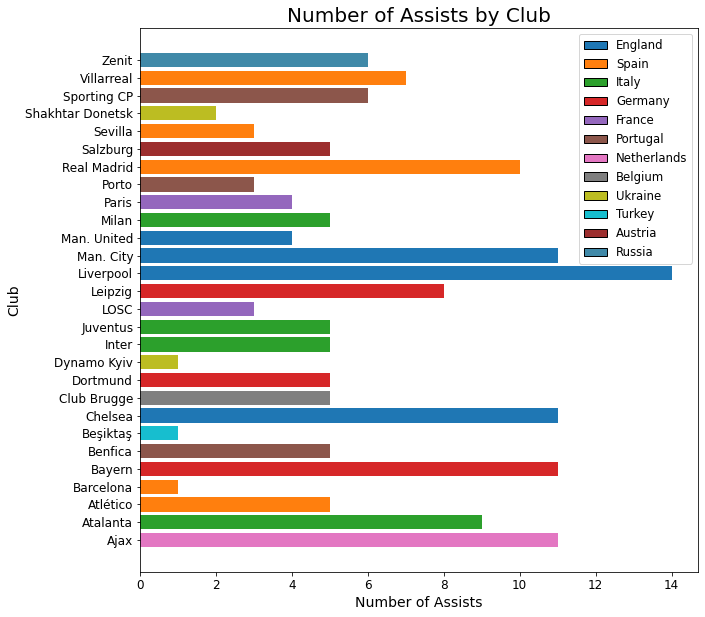

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# create a dictionary of clubs and their countries
clubs = {'Ajax': 'Netherlands',
         'Atalanta': 'Italy',
         'Atlético': 'Spain',
         'Barcelona': 'Spain',
         'Bayern': 'Germany',
         'Benfica': 'Portugal',
         'Beşiktaş': 'Turkey',
         'Chelsea': 'England',
         'Club Brugge': 'Belgium',
         'Dortmund': 'Germany',
         'Dynamo Kyiv': 'Ukraine',
         'Inter': 'Italy',
         'Juventus': 'Italy',
         'LOSC': 'France',
         'Leipzig': 'Germany',
         'Liverpool': 'England',
         'Malmö FF': 'Sweden',
         'Man. City': 'England',
         'Man. United': 'England',
         'Milan': 'Italy',
         'Paris': 'France',
         'Porto': 'Portugal',
         'Real Madrid': 'Spain',
         'Salzburg': 'Austria',
         'Sevilla': 'Spain',
         'Shakhtar Donetsk': 'Ukraine',
         'Sheriff Tiraspol': 'Moldova',
         'Sporting CP': 'Portugal',
         'Villarreal': 'Spain',
         'VfL Wolfsburg': 'Germany',
         'BSC Young Boys': 'Switzerland',
         'Zenit': 'Russia'}

df = pd.read_csv('/Users/anshulhallur/Documents/ISTA 131 Spring 23/Final /attacking.csv')

# drop the first column
df = df.drop(df.columns[0], axis=1)

# add a new "Country" column based on the dictionary
df['Country'] = df['club'].map(clubs)
df.dropna(subset=['Country'], inplace=True) # drop rows with missing values


# group the df by club and count the number of assists
assists = df.groupby('club')['assists'].count().reset_index()

# rename the column to "Assists"
assists = assists.rename(columns={'assists': 'Assists'})

# add a new "Country" column to the "assists" df based on the dictionary
assists['Country'] = assists['club'].map(clubs)


# set colors for each country
colors = {'England': '#1f77b4',
          'Spain': '#ff7f0e',
          'Italy': '#2ca02c',
          'Germany': '#d62728',
          'France': '#9467bd',
          'Portugal': '#8c564b',
          'Netherlands': '#e377c2',
          'Belgium': '#7f7f7f',
          'Ukraine': '#bcbd22',
          'Turkey': '#17becf',
          'Austria': '#9c2e2e',
          'Sweden': '#f0ad4e',
          'Moldova': '#4dd4b4', 
          'Switzerland': '#d9534f',
          'Russia': '#4089a8'}

# Filter out countries with more than 0 assists
countries_with_assists = assists[assists['Assists'] > 0]['Country'].unique()

# Create a new dictionary for countries with more than 0 assists
colors_with_assists = {}
for country, color in colors.items():
    if country in countries_with_assists:
        colors_with_assists[country] = color

# plot a horizontal bar chart of the number of assists by club, colored by country
fig, ax = plt.subplots(figsize=(10, 10))
ax.barh(assists['club'], assists['Assists'], color=assists['Country'].map(colors))
ax.set_title('Number of Assists by Club', fontsize=20)
ax.set_xlabel('Number of Assists', fontsize=14)
ax.set_ylabel('Club', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)

# Add a legend to the plot
handles, labels = [], []
for country, color in colors_with_assists.items():
    handles.append(plt.Rectangle((0, 0), 1, 1, color=color, ec='k'))
    labels.append(country)
ax.legend(handles, labels, loc='upper right', fontsize=11.7)
plt.show()

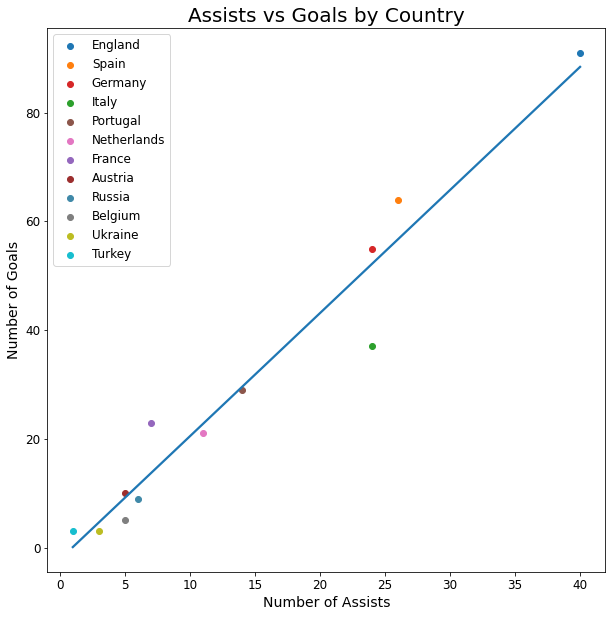

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# create a dictionary of clubs and their countries
clubs = {'Ajax': 'Netherlands',
         'Atalanta': 'Italy',
         'Atlético': 'Spain',
         'Barcelona': 'Spain',
         'Bayern': 'Germany',
         'Benfica': 'Portugal',
         'Beşiktaş': 'Turkey',
         'Chelsea': 'England',
         'Club Brugge': 'Belgium',
         'Dortmund': 'Germany',
         'Dynamo Kyiv': 'Ukraine',
         'Inter': 'Italy',
         'Juventus': 'Italy',
         'LOSC': 'France',
         'Leipzig': 'Germany',
         'Liverpool': 'England',
         'Malmö FF': 'Sweden',
         'Man. City': 'England',
         'Man. United': 'England',
         'Milan': 'Italy',
         'Paris': 'France',
         'Porto': 'Portugal',
         'Real Madrid': 'Spain',
         'Salzburg': 'Austria',
         'Sevilla': 'Spain',
         'Shakhtar Donetsk': 'Ukraine',
         'Sheriff Tiraspol': 'Moldova',
         'Sporting CP': 'Portugal',
         'Villarreal': 'Spain',
         'VfL Wolfsburg': 'Germany',
         'BSC Young Boys': 'Switzerland',
         'Zenit': 'Russia'}

df = pd.read_csv('/Users/anshulhallur/Documents/ISTA 131 Spring 23/Final /attacking.csv')

# drop the first column
df = df.drop(df.columns[0], axis=1)

# add new "Country" column based on the dictionary
df['Country'] = df['club'].map(clubs)
# drop rows with missing values
df.dropna(subset=['Country'], inplace=True) 


# group the df by club and count the number of assists
assists = df.groupby('club')['assists'].count().reset_index()

# rename the column to "Assists"
assists = assists.rename(columns={'assists': 'Assists'})

# add new "Country" column to the assists df based on the dictionary
assists['Country'] = assists['club'].map(clubs)


# set colors for each country
colors = {'England': '#1f77b4',
          'Spain': '#ff7f0e',
          'Italy': '#2ca02c',
          'Germany': '#d62728',
          'France': '#9467bd',
          'Portugal': '#8c564b',
          'Netherlands': '#e377c2',
          'Belgium': '#7f7f7f',
          'Ukraine': '#bcbd22',
          'Turkey': '#17becf',
          'Austria': '#9c2e2e',
          'Sweden': '#f0ad4e',
          'Moldova': '#4dd4b4',
          'Switzerland': '#d9534f',
          'Russia': '#4089a8'}



# read the goals.csv dataset
goals_df = pd.read_csv('/Users/anshulhallur/Documents/ISTA 131 Spring 23/Final /goals.csv')

# Group data by club and sum the goals
goals = goals_df.groupby('club')['goals'].sum().reset_index()

# Merge assists and goals
club_data = pd.merge(assists, goals, on='club')
# Group data by country and sum the assists and goals
country_data = club_data.groupby('Country').sum().reset_index()

# Calculate the combined assists and goals for each country
country_data['Combined'] = country_data['Assists'] + country_data['goals']

# Sort the data by the combined assists and goals, and select the top 5 countries.
# Use nlargest() from pd library to get largest values
top_countries = country_data.nlargest(country_data.shape[0], 'Combined')
top_countries = top_countries.reset_index(drop=True)

# Create a scatter plot with a regression line
fig, ax = plt.subplots(figsize=(10, 10))
sns.regplot(data=top_countries, x='Assists', y='goals', ax=ax, marker='o', ci=None, scatter=False)

# Add scatter plot points with annotations
for idx, row in top_countries.iterrows():
    ax.scatter(row['Assists'], row['goals'], label=row['Country'], color=colors[row['Country']], marker='o')
    

ax.set_title('Assists vs Goals by Country', fontsize=20)
ax.set_xlabel('Number of Assists', fontsize=14)
ax.set_ylabel('Number of Goals', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(fontsize=12)

plt.show()

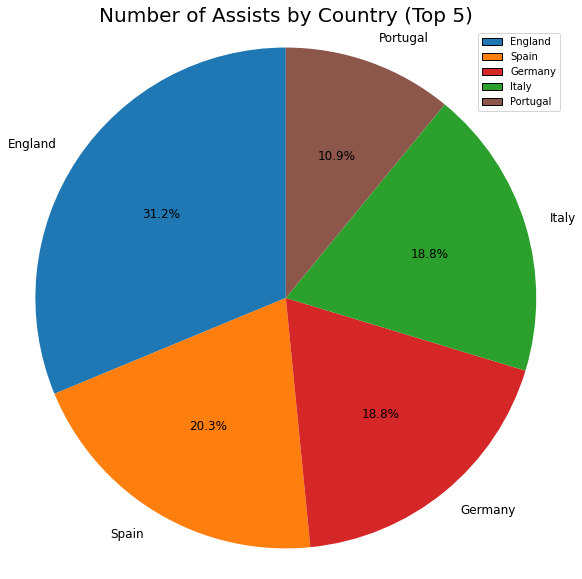

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# create a dictionary of clubs and their countries
clubs = {'Ajax': 'Netherlands',
         'Atalanta': 'Italy',
         'Atlético': 'Spain',
         'Barcelona': 'Spain',
         'Bayern': 'Germany',
         'Benfica': 'Portugal',
         'Beşiktaş': 'Turkey',
         'Chelsea': 'England',
         'Club Brugge': 'Belgium',
         'Dortmund': 'Germany',
         'Dynamo Kyiv': 'Ukraine',
         'Inter': 'Italy',
         'Juventus': 'Italy',
         'LOSC': 'France',
         'Leipzig': 'Germany',
         'Liverpool': 'England',
         'Malmö FF': 'Sweden',
         'Man. City': 'England',
         'Man. United': 'England',
         'Milan': 'Italy',
         'Paris': 'France',
         'Porto': 'Portugal',
         'Real Madrid': 'Spain',
         'Salzburg': 'Austria',
         'Sevilla': 'Spain',
         'Shakhtar Donetsk': 'Ukraine',
         'Sheriff Tiraspol': 'Moldova',
         'Sporting CP': 'Portugal',
         'Villarreal': 'Spain',
         'VfL Wolfsburg': 'Germany',
         'BSC Young Boys': 'Switzerland',
         'Zenit': 'Russia'}

df = pd.read_csv('/Users/anshulhallur/Documents/ISTA 131 Spring 23/Final /attacking.csv')

# drop the first column
df = df.drop(df.columns[0], axis=1)

# add a new "Country" column based on the dictionary
df['Country'] = df['club'].map(clubs)
df.dropna(subset=['Country'], inplace=True) # drop rows with missing values


# group the DataFrame by club and count the number of assists
assists = df.groupby('club')['assists'].count().reset_index()

# rename the column to "Assists"
assists = assists.rename(columns={'assists': 'Assists'})

# add a new "Country" column to the "assists" df based on the dictionary
assists['Country'] = assists['club'].map(clubs)


# set colors for each country
colors = {'England': '#1f77b4',
          'Spain': '#ff7f0e',
          'Italy': '#2ca02c',
          'Germany': '#d62728',
          'France': '#9467bd',
          'Portugal': '#8c564b',
          'Netherlands': '#e377c2',
          'Belgium': '#7f7f7f',
          'Ukraine': '#bcbd22',
          'Turkey': '#17becf',
          'Austria': '#9c2e2e',
          'Sweden': '#f0ad4e',
          'Moldova': '#4dd4b4',  # Changed color for Moldova
          'Switzerland': '#d9534f',
          'Russia': '#4089a8'}

# group the assists DataFrame by Country and sum the number of assists
assists_by_country = assists.groupby('Country')['Assists'].sum().reset_index()

# Sort the assists_by_country DataFrame by the number of assists, in descending order
assists_by_country_sorted = assists_by_country.sort_values('Assists', ascending=False)

# Select the top 5 countries
top_5_countries = assists_by_country_sorted.head(5)

# Set up the plot and plot the pie chart
fig, ax = plt.subplots(figsize=(10, 10))
# Create the pie chart
ax.pie(
    x=top_5_countries['Assists'], # Data to plot
    labels=top_5_countries['Country'], # Set Label
    colors=top_5_countries['Country'].map(colors), # Set colors
    autopct='%1.1f%%', # Format for the percentage values
    startangle=90 # Angle at which to start
)

# Customize the plot
ax.set_title('Number of Assists by Country (Top 5)', fontsize=20)
ax.axis('equal')  # ensures that the pie chart is circular

# Add a legend to the plot
handles = []
for country in top_5_countries['Country']:
    if country in colors:
        handle = plt.Rectangle((0, 0), 1, 1, color=colors[country], ec='k')
        handles.append(handle)
labels = []
for country in top_5_countries['Country']:
    if country in colors:
        labels.append(country)
ax.legend(handles, labels, loc='upper right', fontsize=10)

# Set the font size of labels and percentages
for text in ax.texts:
    text.set_fontsize(12)

plt.show()

